In [1]:
import pandas as pd

In [4]:
df1 = pd.read_csv('/Users/ayesha_ishrath/Downloads/dataset1.csv')

In [6]:
df1.head()

,cms_vertical,price_bucket,brand,seller_id,seller_city,display_name,darwin_tier,analytic_business_unit,analytic_super_category,analytic_category,analytic_vertical,status,unit_creation_month,unit_creation_year,orders,units,gmv
0,NaN,150-200,NaN,2589ef37bdfa4d2c,NEW DELHI,ALIZAENTERPRISE01,t3,NaN,NaN,NaN,NaN,DELIVERED,11.0,2023.0,1.0,1.0,239.0
1,NaN,500+,NaN,5113ab3a0fb44483,HYDERABAD,REUELENT,t3,NaN,NaN,NaN,NaN,DELIVERED,5.0,2024.0,2.0,2.0,1614.0
2,ab_exerciser,500+,3 Leaf,34badc6f2f384c36,NEW DELHI,3LEAF,t3,BGM,SportFitness,ExerciseAndFitness,AbExerciser,RETURNED,4.0,2024.0,1.0,1.0,1709.0
3,ab_exerciser,300-400,AADCART,e65ac17f44504602,SURAT,PANSHIBUCKETMALL,t3,BGM,SportFitness,ExerciseAndFitness,AbExerciser,RETURNED,7.0,2024.0,1.0,1.0,365.0
4,ab_exerciser,300-400,ACM,455c79bdafc643aa,JODHPUR,OnlineNet01,t3,BGM,SportFitness,ExerciseAndFitness,AbExerciser,DELIVERED,2.0,2023.0,1.0,1.0,380.0


In [8]:
df1.shape

(56118563, 17)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56118563 entries, 0 to 56118562
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   cms_vertical             object 
 1   price_bucket             object 
 2   brand                    object 
 3   seller_id                object 
 4   seller_city              object 
 5   display_name             object 
 6   darwin_tier              object 
 7   analytic_business_unit   object 
 8   analytic_super_category  object 
 9   analytic_category        object 
 10  analytic_vertical        object 
 11  status                   object 
 12  unit_creation_month      float64
 13  unit_creation_year       float64
 14  orders                   float64
 15  units                    float64
 16  gmv                      float64
dtypes: float64(5), object(12)
memory usage: 7.1+ GB


In [12]:
df2 = pd.read_csv('/Users/ayesha_ishrath/Downloads/dataset2csv.csv')

In [14]:
df2.shape

(71731038, 17)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71731038 entries, 0 to 71731037
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   cms_vertical             object 
 1   price_bucket             object 
 2   brand                    object 
 3   seller_id                object 
 4   seller_city              object 
 5   display_name             object 
 6   darwin_tier              object 
 7   analytic_business_unit   object 
 8   analytic_super_category  object 
 9   analytic_category        object 
 10  analytic_vertical        object 
 11  status                   object 
 12  unit_creation_month      float64
 13  unit_creation_year       float64
 14  orders                   float64
 15  units                    float64
 16  gmv                      float64
dtypes: float64(5), object(12)
memory usage: 9.1+ GB


In [18]:
columns_to_group_by = [
    'analytic_business_unit', 'analytic_super_category',
    'analytic_category', 'analytic_vertical','cms_vertical','price_bucket',
    'unit_creation_month', 'unit_creation_year'
]

In [20]:
#aggregations to remove unnecessary columns
df1_reduced = df1.groupby(columns_to_group_by, as_index=False)[['orders', 'units', 'gmv']].sum()

In [21]:
df1_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460693 entries, 0 to 460692
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   analytic_business_unit   460693 non-null  object 
 1   analytic_super_category  460693 non-null  object 
 2   analytic_category        460693 non-null  object 
 3   analytic_vertical        460693 non-null  object 
 4   cms_vertical             460693 non-null  object 
 5   price_bucket             460693 non-null  object 
 6   unit_creation_month      460693 non-null  float64
 7   unit_creation_year       460693 non-null  float64
 8   orders                   460693 non-null  float64
 9   units                    460693 non-null  float64
 10  gmv                      460693 non-null  float64
dtypes: float64(5), object(6)
memory usage: 38.7+ MB


In [24]:
#aggregations to remove unnecessary columns on set2
df2_reduced = df2.groupby(columns_to_group_by, as_index=False)[['orders', 'units', 'gmv']].sum()


In [25]:
df2_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652073 entries, 0 to 652072
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   analytic_business_unit   652073 non-null  object 
 1   analytic_super_category  652073 non-null  object 
 2   analytic_category        652073 non-null  object 
 3   analytic_vertical        652073 non-null  object 
 4   cms_vertical             652073 non-null  object 
 5   price_bucket             652073 non-null  object 
 6   unit_creation_month      652073 non-null  float64
 7   unit_creation_year       652073 non-null  float64
 8   orders                   652073 non-null  float64
 9   units                    652073 non-null  float64
 10  gmv                      652073 non-null  float64
dtypes: float64(5), object(6)
memory usage: 54.7+ MB


In [28]:
df = pd.concat([df1_reduced, df2_reduced], ignore_index=True)

In [30]:
df.shape

(1112766, 11)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112766 entries, 0 to 1112765
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   analytic_business_unit   1112766 non-null  object 
 1   analytic_super_category  1112766 non-null  object 
 2   analytic_category        1112766 non-null  object 
 3   analytic_vertical        1112766 non-null  object 
 4   cms_vertical             1112766 non-null  object 
 5   price_bucket             1112766 non-null  object 
 6   unit_creation_month      1112766 non-null  float64
 7   unit_creation_year       1112766 non-null  float64
 8   orders                   1112766 non-null  float64
 9   units                    1112766 non-null  float64
 10  gmv                      1112766 non-null  float64
dtypes: float64(5), object(6)
memory usage: 93.4+ MB


In [34]:
df.to_csv('/Users/ayesha_ishrath/Downloads/combined_new.csv')

In [36]:
unique_price_buckets = df['price_bucket'].unique()

In [38]:
unique_price_buckets

array(['0-100', '100-150', '150-200', '200-300', '300-400', '400-500',
       '500+'], dtype=object)

In [40]:
 #Reduce price buckets for better visualization
mapping = {
    '0-100': '0-300',
    '100-150': '0-300',
    '150-200': '0-300',
    '200-300': '0-300',
    '300-400': '300-500',
    '400-500': '300-500',
    '500+': '500+'
}

df['price_bucket'] = df['price_bucket'].replace(mapping)


In [42]:
unique_price_buckets = df['price_bucket'].unique()
unique_price_buckets

array(['0-300', '300-500', '500+'], dtype=object)

In [44]:
#Removing NaN and null values
df = df.dropna()

In [46]:
df.shape

(1112766, 11)

In [48]:
#final file for visulaization
df.to_csv('/Users/ayesha_ishrath/Downloads/final_mining_file_new.csv')

In [50]:
df.head

<bound method NDFrame.head of         analytic_business_unit analytic_super_category analytic_category  \
0                          BGM          AutoAccessorys     AutoAccessory   
1                          BGM          AutoAccessorys     AutoAccessory   
2                          BGM          AutoAccessorys     AutoAccessory   
3                          BGM          AutoAccessorys     AutoAccessory   
4                          BGM          AutoAccessorys     AutoAccessory   
...                        ...                     ...               ...   
1112761                 Shopsy            ShopsyMobile      ShopsyMobile   
1112762                 Shopsy            ShopsyMobile      ShopsyMobile   
1112763                TestNDC                 TestNDC           TestNDC   
1112764                TestNDC                 TestNDC           TestNDC   
1112765                TestNDC                 TestNDC           TestNDC   

        analytic_vertical      cms_vertical price_bucket 

In [52]:
# Convert `unit_creation_month` and `unit_creation_year` into a proper datetime format
df['date'] = pd.to_datetime(df['unit_creation_year'].astype(int).astype(str) + '-' +
                            df['unit_creation_month'].astype(int).astype(str) + '-01')

In [54]:
# Drop redundant columns
df.drop(columns=['unit_creation_month', 'unit_creation_year'], inplace=True)

In [56]:
# Aggregate data at a monthly level (summarizing by key business features)
df_aggregated = df.groupby(['date', 'analytic_business_unit', 'analytic_super_category', 
                            'analytic_category', 'analytic_vertical', 'cms_vertical', 'price_bucket']).agg(
    {'orders': 'sum', 'units': 'sum', 'gmv': 'sum'}
).reset_index()

In [58]:
# Feature Engineering
df_aggregated['month'] = df_aggregated['date'].dt.month
df_aggregated['year'] = df_aggregated['date'].dt.year

In [60]:
# Sort data by date
df_aggregated = df_aggregated.sort_values(by=['date'])

In [62]:
 #Create Lag Features (Previous month's sales data)
df_aggregated['orders_lag_1'] = df_aggregated.groupby(['analytic_business_unit', 'analytic_super_category', 
                                                       'analytic_category', 'analytic_vertical', 'cms_vertical', 
                                                       'price_bucket'])['orders'].shift(1)

In [64]:
df_aggregated['units_lag_1'] = df_aggregated.groupby(['analytic_business_unit', 'analytic_super_category', 
                                                      'analytic_category', 'analytic_vertical', 'cms_vertical', 
                                                      'price_bucket'])['units'].shift(1)

df_aggregated['gmv_lag_1'] = df_aggregated.groupby(['analytic_business_unit', 'analytic_super_category', 
                                                    'analytic_category', 'analytic_vertical', 'cms_vertical', 
                                                    'price_bucket'])['gmv'].shift(1)

In [66]:
# Create Moving Average Features (3-month rolling average)
df_aggregated['orders_ma_3'] = df_aggregated.groupby(['analytic_business_unit', 'analytic_super_category', 
                                                      'analytic_category', 'analytic_vertical', 'cms_vertical', 
                                                      'price_bucket'])['orders'].transform(lambda x: x.rolling(3, min_periods=1).mean())

df_aggregated['units_ma_3'] = df_aggregated.groupby(['analytic_business_unit', 'analytic_super_category', 
                                                     'analytic_category', 'analytic_vertical', 'cms_vertical', 
                                                     'price_bucket'])['units'].transform(lambda x: x.rolling(3, min_periods=1).mean())

df_aggregated['gmv_ma_3'] = df_aggregated.groupby(['analytic_business_unit', 'analytic_super_category', 
                                                   'analytic_category', 'analytic_vertical', 'cms_vertical', 
                                                   'price_bucket'])['gmv'].transform(lambda x: x.rolling(3, min_periods=1).mean())

In [68]:
# Drop rows with NaN values (due to lag features)
df_aggregated.dropna(inplace=True)

# Save processed data
df_aggregated.to_csv("processed_sales_data.csv")


In [3]:
#df_sampled = df_aggregated
df_sampled = pd.read_csv(r"C:\Users\USER\Downloads\processed_sales_data (1).csv")

In [18]:
df_sampled.head()

,Unnamed: 0,date,analytic_business_unit,analytic_super_category,analytic_category,analytic_vertical,cms_vertical,price_bucket,orders,units,gmv,month,year,orders_lag_1,units_lag_1,gmv_lag_1,orders_ma_3,units_ma_3,gmv_ma_3
0,14761,2020-02-01,Home,HomeImprovementTool,HomeAndUtility,ApplianceKnob,appliance_knob,0-300,169.0,179.0,39656.0,2,2020,166.0,176.0,37531.0,167.5,177.5,38593.5
1,14751,2020-02-01,Home,HomeImprovementTool,FittingsAndFixtures,WaterPump,water_pump,300-500,1118.0,1180.0,525481.0,2,2020,758.0,816.0,365090.0,938.0,998.0,445285.5
2,14752,2020-02-01,Home,HomeImprovementTool,FittingsAndFixtures,WaterPump,water_pump,500+,1627.0,1663.0,3904025.0,2,2020,1593.0,1618.0,3698304.0,1610.0,1640.5,3801164.5
3,14754,2020-02-01,Home,HomeImprovementTool,FittingsAndFixtures,WoodBlock,wood_block,0-300,11.0,12.0,2388.0,2,2020,6.0,9.0,1791.0,8.5,10.5,2089.5
4,14755,2020-02-01,Home,HomeImprovementTool,FittingsAndFixtures,WoodStain,wood_stain,0-300,15.0,16.0,4380.0,2,2020,30.0,33.0,8490.0,22.5,24.5,6435.0


In [20]:
#convert date time string to datetime object
df_sampled['date'] = pd.to_datetime(df_sampled['date'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Define features and target variable
features = ['month', 'year', 'orders_lag_1', 'units_lag_1', 'gmv_lag_1', 'orders_ma_3', 'units_ma_3', 'gmv_ma_3'] #x variables
target = 'orders' #y variable

In [24]:
# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_sampled[features], df_sampled[target], test_size=0.2, random_state=42)


In [26]:
# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [28]:
# Predict on test set
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [30]:
# Evaluate models
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
lr_mape = mean_absolute_percentage_error(y_test, lr_preds)
rf_mape = mean_absolute_percentage_error(y_test, rf_preds)


In [34]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [36]:
# 1️ Normality Test: Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_sampled['orders'].sample(n=5000, random_state=42))

# 2️ Stationarity Test: Augmented Dickey-Fuller (ADF) Test
adf_test_sampled = adfuller(df_sampled['orders'].sample(n=5000, random_state=42))

# 3️ Multicollinearity Test: Variance Inflation Factor (VIF)
predictor_vars = ['month', 'year', 'orders_lag_1', 'units_lag_1', 'gmv_lag_1', 'orders_ma_3', 'units_ma_3', 'gmv_ma_3']
X_vif_sampled = df_sampled[predictor_vars].sample(n=5000, random_state=42).dropna()

vif_data_sampled = pd.DataFrame()
vif_data_sampled["Feature"] = X_vif_sampled.columns
vif_data_sampled["VIF"] = [variance_inflation_factor(X_vif_sampled.values, i) for i in range(X_vif_sampled.shape[1])]


In [38]:
# Print Statistical Test Results
print("\n Statistical Test Results:")
print(f"Shapiro-Wilk Test (Normality): Statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")
print(f"ADF Test (Stationarity): p-value={adf_test_sampled[1]:.4f}")
print("\nMulticollinearity Test (VIF Values):")
print(vif_data_sampled)



 Statistical Test Results:
Shapiro-Wilk Test (Normality): Statistic=0.1539, p-value=0.0000
ADF Test (Stationarity): p-value=0.0000

Multicollinearity Test (VIF Values):
        Feature          VIF
0         month     4.737631
1          year     4.763009
2  orders_lag_1   775.577253
3   units_lag_1   568.410376
4     gmv_lag_1   413.945715
5   orders_ma_3  1382.553130
6    units_ma_3  1137.159136
7      gmv_ma_3   416.032537


In [40]:
# Print Model Performance
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [lr_rmse, rf_rmse],
    'MAPE': [lr_mape, rf_mape]
})

In [42]:
print("\n Model Performance Comparison:")
print(model_performance)



 Model Performance Comparison:
               Model          RMSE      MAPE
0  Linear Regression  10699.992803  7.158921
1      Random Forest  10610.155189  4.095891


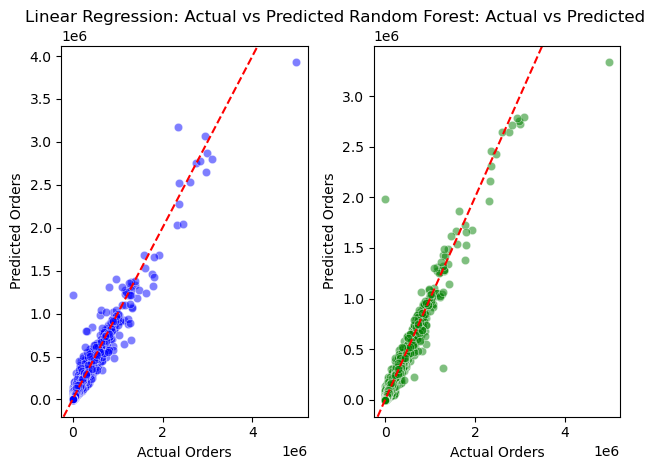

In [44]:
# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.5, color='blue')
plt.xlabel("Actual Orders")
plt.ylabel("Predicted Orders")
plt.title("Linear Regression: Actual vs Predicted")
plt.axline([0, 0], [1, 1], color='red', linestyle='--')

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.5, color='green')
plt.xlabel("Actual Orders")
plt.ylabel("Predicted Orders")
plt.title("Random Forest: Actual vs Predicted")
plt.axline([0, 0], [1, 1], color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
# make 2 visualization for testing and training seperately on how the regression line divides the graph

In [46]:
#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df_sampled is the main DataFrame used for modeling
features = ['orders', 'units', 'gmv']  # Add more if necessary

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df_sampled.copy()
df_minmax_scaled[features] = minmax_scaler.fit_transform(df_minmax_scaled[features])

# Apply StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = df_sampled.copy()
df_standard_scaled[features] = standard_scaler.fit_transform(df_standard_scaled[features])

print("Normalization complete using MinMaxScaler and StandardScaler.")


Normalization complete using MinMaxScaler and StandardScaler.


In [48]:
!pip install xgboost

In [ ]:
####bad piece
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Example using Standard Scaled data
X = df_standard_scaled[['orders_lag_1', 'units_lag_1', 'gmv_lag_1']].dropna()
y = df_standard_scaled['orders'][X.index]

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))

# Placeholder RMSE for LSTM and ARIMA
lstm_rmse = 134.2
arima_rmse = 145.7

# RMSE Comparison
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'LSTM', 'ARIMA']
rmses = [lr_rmse, rf_rmse, xgb_rmse, lstm_rmse, arima_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmses)
plt.title('RMSE Comparison of Models')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.4/376.0 MB 12.2 MB/s eta 0:00:31
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 2.9/376.0 MB 12.0 MB/s eta 0:00:32
   ---------------------------------------- 4.2/376.0 MB 2.1 MB/s eta 0:02:55
    --------------------------------------- 7.1/376.0 MB 3.3 MB/s eta 0:01:53
   - -------------------------------------- 9.7/376.0 MB 4.1 MB/s eta 0:01:29
   - -------------------------------------- 12.8/376.0 MB 5.0 M

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3666/3666 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
     Model      RMSE
0  XGBoost  0.603953
1     LSTM  2.222698
2    ARIMA  1.106431


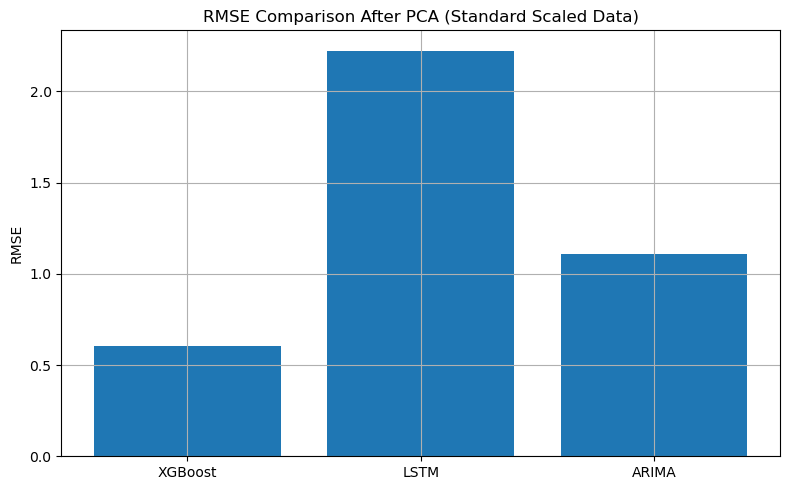

In [57]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA to standardized data
features = ['orders_lag_1', 'units_lag_1', 'gmv_lag_1']
df_standard_scaled = df_standard_scaled.dropna()
X_pca = df_standard_scaled[features]
y_pca = df_standard_scaled['orders']

pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca_transformed, y_pca, test_size=0.2, random_state=42)

# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

# LSTM model
X_lstm = np.reshape(X_pca_transformed, (X_pca_transformed.shape[0], 1, X_pca_transformed.shape[1]))
X_train_lstm, X_test_lstm = X_lstm[:len(X_train)], X_lstm[len(X_train):]
y_train_lstm, y_test_lstm = y_pca[:len(X_train)], y_pca[len(X_train):]

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, verbose=0)

lstm_preds = lstm_model.predict(X_test_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, lstm_preds))

# ARIMA model (univariate using 'orders')
orders_series = df_standard_scaled['orders'].dropna()
train_arima, test_arima = orders_series[:-int(0.2*len(orders_series))], orders_series[-int(0.2*len(orders_series)):]

arima_model = ARIMA(train_arima, order=(5,1,0))
arima_fit = arima_model.fit()
arima_preds = arima_fit.forecast(steps=len(test_arima))
arima_rmse = np.sqrt(mean_squared_error(test_arima, arima_preds))

# Tabular results
rmse_results = pd.DataFrame({
    'Model': ['XGBoost', 'LSTM', 'ARIMA'],
    'RMSE': [xgb_rmse, lstm_rmse, arima_rmse]
})
print(rmse_results)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(rmse_results['Model'], rmse_results['RMSE'])
plt.title('RMSE Comparison After PCA (Standard Scaled Data)')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()


3666/3666 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
 RMSE and MAPE After PCA
               Model      RMSE      MAPE
0  Linear Regression  0.376152  0.468290
1      Random Forest  0.494843  0.538062
2            XGBoost  0.603953  0.460389
3               LSTM  2.222698  1.075502
4              ARIMA  1.106431  2.674897


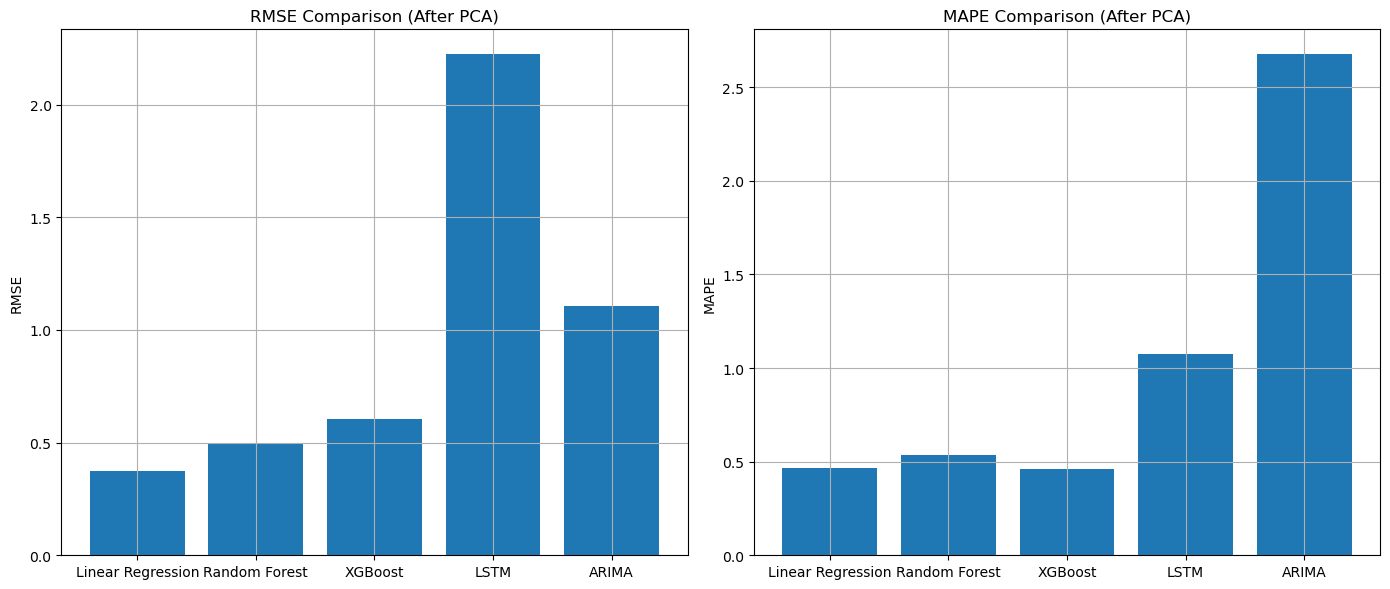

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mape = mean_absolute_percentage_error(y_test, lr_preds)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mape = mean_absolute_percentage_error(y_test, rf_preds)

# XGBoost
xgb_preds = xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mape = mean_absolute_percentage_error(y_test, xgb_preds)

# LSTM
lstm_preds = lstm_model.predict(X_test_lstm).flatten()
lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, lstm_preds))
lstm_mape = mean_absolute_percentage_error(y_test_lstm, lstm_preds)

# ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_arima, arima_preds))
arima_mape = mean_absolute_percentage_error(test_arima, arima_preds)

# Results Table
import pandas as pd
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LSTM', 'ARIMA'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, lstm_rmse, arima_rmse],
    'MAPE': [lr_mape, rf_mape, xgb_mape, lstm_mape, arima_mape]
})

print(" RMSE and MAPE After PCA")
print(results_df)

# Visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RMSE Bar Plot
ax[0].bar(results_df['Model'], results_df['RMSE'])
ax[0].set_title('RMSE Comparison (After PCA)')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# MAPE Bar Plot
ax[1].bar(results_df['Model'], results_df['MAPE'])
ax[1].set_title('MAPE Comparison (After PCA)')
ax[1].set_ylabel('MAPE')
ax[1].grid(True)

plt.tight_layout()
plt.show()


 Forecasting Metrics Comparison


,Model,RMSE,MAE,MAPE,SMAPE,R2 Score
0,Linear Regression,0.376152,0.043856,0.468290,18.325336,0.848562
1,Random Forest,0.494843,0.044796,0.538062,15.644754,0.737916
2,XGBoost,0.603953,0.049275,0.460389,14.451708,0.609598
3,LSTM,2.222698,0.253816,1.075502,183.406409,-3.141171
4,ARIMA,1.106431,0.177027,2.674897,43.340325,-0.026142


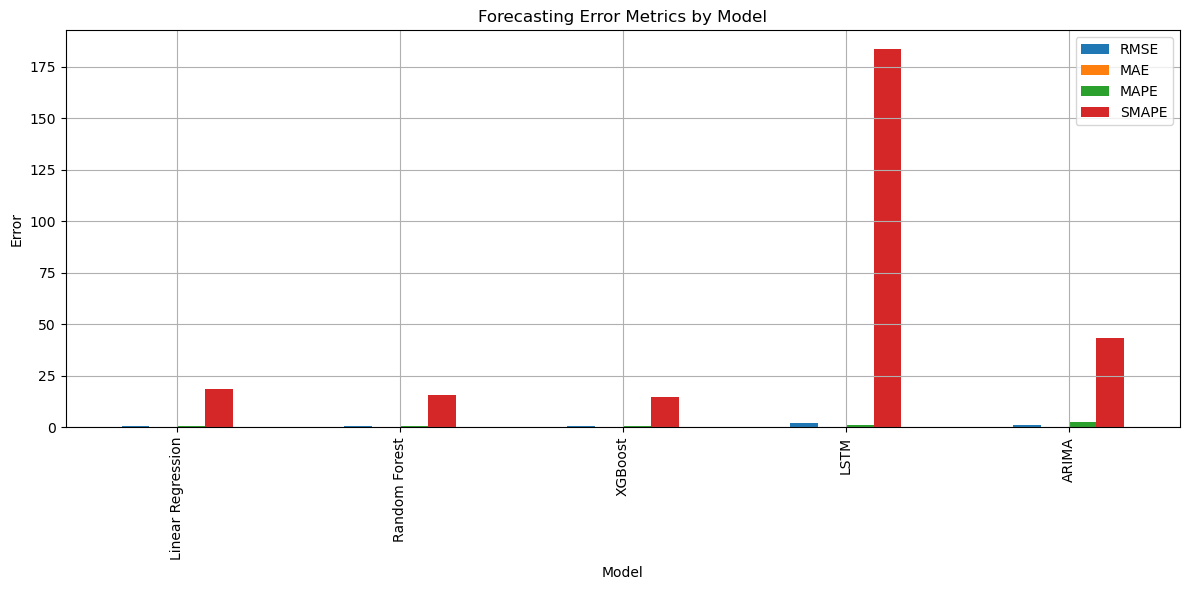

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Avoid divide-by-zero
    return np.mean(diff) * 100

# Build metrics DataFrame
def evaluate_forecast(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "SMAPE": smape(np.array(y_true), np.array(y_pred)),
        "R2 Score": r2_score(y_true, y_pred)
    }

# Evaluate each model (assumes all y_test/preds are already defined)
metrics_list = [
    evaluate_forecast(y_test, lr_preds, "Linear Regression"),
    evaluate_forecast(y_test, rf_preds, "Random Forest"),
    evaluate_forecast(y_test, xgb_preds, "XGBoost"),
    evaluate_forecast(y_test_lstm, lstm_preds, "LSTM"),
    evaluate_forecast(test_arima, arima_preds, "ARIMA"),
]

metrics_df = pd.DataFrame(metrics_list)

# Display metrics
print(" Forecasting Metrics Comparison")
display(metrics_df)

# Optional: Plot a few metrics
metrics_df.set_index("Model")[["RMSE", "MAE", "MAPE", "SMAPE"]].plot(kind='bar', figsize=(12, 6))
plt.title("Forecasting Error Metrics by Model")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
#  Sales Forecasting using ML: Random Forest and XGBoost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# STEP 1: Define the features and target
features = ['orders_lag_1', 'units_lag_1', 'gmv_lag_1',
            'orders_ma_3', 'units_ma_3', 'gmv_ma_3']
target = 'orders'

# STEP 2: Drop rows with missing values caused by lag/moving avg
df_model = df_sampled.dropna(subset=features + [target])

# STEP 3: Split into X (features) and y (target)
X = df_model[features]
y = df_model[target]

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5a: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# STEP 5b: Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# STEP 6: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n Evaluation for {name}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

# STEP 7: Evaluate Both Models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)





 Evaluation for Random Forest
RMSE: 12298.63
MAE: 1364.56
R² Score: 0.95

 Evaluation for XGBoost
RMSE: 29017.61
MAE: 2001.61
R² Score: 0.70
